In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/hacc.csv')
df.head()

,Charge Station Name,Session Initiated By,Start Time,End Time,Duration,Energy(kWh),Session Amount,Session Id,Port Type,Payment Mode
0,A,MOBILE,9/1/2018 7:25,9/1/2018 7:53,0:28:29,8.84,$4.77,3168811,CHADEMO,RFID
1,A,MOBILE,9/1/2018 8:03,9/1/2018 8:34,0:31:18,22.02,$11.89,3168847,CHADEMO,CREDITCARD
2,A,MOBILE,9/1/2018 10:24,9/1/2018 10:25,0:00:18,0.00,$0.00,3169011,CHADEMO,RFID
3,A,MOBILE,9/1/2018 10:26,9/1/2018 11:02,0:36:04,23.80,$11.66,3169015,CHADEMO,RFID
4,A,MOBILE,9/1/2018 11:07,9/1/2018 11:39,0:31:17,9.87,$4.84,3169054,CHADEMO,RFID


In [3]:
len(df)

10452

In [4]:
print(df.columns)
df.columns = ['name', 'session_type', 'start_time', 'end_time', 'duration', 'energy', 'amount', 'id', 'port_type', 'payment_mode']
print(df.columns)

Index(['Charge Station Name', 'Session Initiated By', 'Start Time', 'End Time',
       'Duration', 'Energy(kWh)', 'Session Amount', 'Session Id', 'Port Type',
       'Payment Mode'],
      dtype='object')
Index(['name', 'session_type', 'start_time', 'end_time', 'duration', 'energy',
       'amount', 'id', 'port_type', 'payment_mode'],
      dtype='object')


In [5]:
df.dtypes

name             object
session_type     object
start_time       object
end_time         object
duration         object
energy          float64
amount           object
id                int64
port_type        object
payment_mode     object
dtype: object

In [6]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Changes the payment amount to a raw float value instead of a string of the form "$X.XX"
df['amount'] = df['amount'].replace('[\$,]', '', regex=True).astype(float)
df.head()

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode
0,A,MOBILE,2018-09-01 07:25:00,2018-09-01 07:53:00,0:28:29,8.84,4.77,3168811,CHADEMO,RFID
1,A,MOBILE,2018-09-01 08:03:00,2018-09-01 08:34:00,0:31:18,22.02,11.89,3168847,CHADEMO,CREDITCARD
2,A,MOBILE,2018-09-01 10:24:00,2018-09-01 10:25:00,0:00:18,0.00,0.00,3169011,CHADEMO,RFID
3,A,MOBILE,2018-09-01 10:26:00,2018-09-01 11:02:00,0:36:04,23.80,11.66,3169015,CHADEMO,RFID
4,A,MOBILE,2018-09-01 11:07:00,2018-09-01 11:39:00,0:31:17,9.87,4.84,3169054,CHADEMO,RFID


In [7]:
df[df['duration'].str.contains('-')]['duration']

1119    -15:-38:-1
Name: duration, dtype: object

## Data Errors
Types of errors found:
1. Positive energy, Zero amount -- Resolution: ?
2. Positive amount, Zero energy -- Resolution: ?

In [8]:
# Checking for any missing values
missing = df[(df['energy'] == 0) | (df['amount'] == 0)]
print(len(missing))
missing.head()

2158


,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode
2,A,MOBILE,2018-09-01 10:24:00,2018-09-01 10:25:00,0:00:18,0.0,0.0,3169011,CHADEMO,RFID
14,A,DEVICE,2018-09-01 20:19:00,2018-09-01 20:19:00,0:00:18,0.0,0.0,3169515,CHADEMO,CREDITCARD
15,A,DEVICE,2018-09-01 20:21:00,2018-09-01 20:21:00,0:00:18,0.0,0.0,3169516,CHADEMO,CREDITCARD
20,A,DEVICE,2018-09-02 12:11:00,2018-09-02 12:12:00,0:00:17,0.0,0.0,3170042,CHADEMO,CREDITCARD
21,A,DEVICE,2018-09-02 12:12:00,2018-09-02 12:13:00,0:00:18,0.0,0.0,3170043,CHADEMO,CREDITCARD


In [9]:
# Anyone who charges their car but doesn't pay is a "thief" -- correctable if we just use HECO formula?
# Question: Is this ALWAYS just a data issue or do some people actually get away without paying?
thieves = df[(df['energy'] > 0) & (df['amount'] == 0)]
print(len(thieves))
thieves.head()

404


,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode
688,A,DEVICE,2018-10-15 08:57:00,2018-10-15 09:01:00,0:04:03,1.03,0.0,3240471,CHADEMO,RFID
1119,A,DEVICE,2018-11-13 08:21:00,2018-11-12 16:43:00,-15:-38:-1,59.07,0.0,3288825,CHADEMO,CREDITCARD
1864,A,DEVICE,2019-01-09 16:01:00,2019-01-09 16:35:00,0:33:56,5.97,0.0,3385048,CHADEMO,CREDITCARD
1940,A,MOBILE,2019-01-13 08:07:00,2019-01-13 08:08:00,0:00:30,0.06,0.0,3391560,CHADEMO,RFID
1990,A,WEB,2019-01-15 10:46:00,2019-01-15 11:13:00,0:27:21,13.38,0.0,3395084,CHADEMO,RFID


In [10]:
# Anyone who used 0 energy but still paid got "jipped"
jipped = df[(df['energy'] == 0) & (df['amount'] > 0)]
print(len(jipped))
jipped.head()

0


,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode


In [11]:
dates = df['start_time'].dt.date
df['date'] = dates
df['date']

0        2018-09-01
1        2018-09-01
2        2018-09-01
3        2018-09-01
4        2018-09-01
            ...    
10447    2019-08-31
10448    2019-08-31
10449    2019-08-31
10450    2019-08-31
10451    2019-08-31
Name: date, Length: 10452, dtype: object

In [12]:
df['day_of_week'] = df['start_time'].dt.day_name()
df['day_of_week']

0        Saturday
1        Saturday
2        Saturday
3        Saturday
4        Saturday
           ...   
10447    Saturday
10448    Saturday
10449    Saturday
10450    Saturday
10451    Saturday
Name: day_of_week, Length: 10452, dtype: object

## Time of Day
Noting from his slides:

Times:
- On Peak: 5pm - 10pm => 17:00 - 22:00, Daily
- Mid Day: 9am - 5pm => 9:00 => 17:00, Daily
- Off Peak: 10pm - 9am => 22:00 - 9:00, Daily

Cost:
- On Peak: \$0.57
- Mid Day: \$0.49
- Off Peak: \$0.54


In [13]:
import datetime as dt
start_times = df['start_time'].dt.time
df['on_peak'] = (dt.time(17, 0, 0) <= start_times) & (start_times < dt.time(22, 0, 0))
df['mid_day'] = (dt.time(9, 0, 0) <= start_times) & (start_times < dt.time(17, 0, 0))
df['off_peak'] = (dt.time(22, 0, 0) <= start_times) | (start_times < dt.time(9, 0, 0))
df.head()

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak
0,A,MOBILE,2018-09-01 07:25:00,2018-09-01 07:53:00,0:28:29,8.84,4.77,3168811,CHADEMO,RFID,2018-09-01,Saturday,False,False,True
1,A,MOBILE,2018-09-01 08:03:00,2018-09-01 08:34:00,0:31:18,22.02,11.89,3168847,CHADEMO,CREDITCARD,2018-09-01,Saturday,False,False,True
2,A,MOBILE,2018-09-01 10:24:00,2018-09-01 10:25:00,0:00:18,0.00,0.00,3169011,CHADEMO,RFID,2018-09-01,Saturday,False,True,False
3,A,MOBILE,2018-09-01 10:26:00,2018-09-01 11:02:00,0:36:04,23.80,11.66,3169015,CHADEMO,RFID,2018-09-01,Saturday,False,True,False
4,A,MOBILE,2018-09-01 11:07:00,2018-09-01 11:39:00,0:31:17,9.87,4.84,3169054,CHADEMO,RFID,2018-09-01,Saturday,False,True,False


## Error Checking
Checking if each columns are in agreement with each other
1. Does cost match with the amount of energy for the given time period?

In [14]:
df['calculated_amount'] = df['energy'] * df['on_peak'] * 0.57 + df['energy'] * df['mid_day'] * 0.49 + df['energy'] * df['off_peak'] * 0.54
df['rounded_calculated_amount'] = np.round(df['calculated_amount'], 2)
correct = df[(df['amount'] == df['rounded_calculated_amount'])]
err = df[~(df['amount'] == df['rounded_calculated_amount'])]
correct.head()

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak,calculated_amount,rounded_calculated_amount
0,A,MOBILE,2018-09-01 07:25:00,2018-09-01 07:53:00,0:28:29,8.84,4.77,3168811,CHADEMO,RFID,2018-09-01,Saturday,False,False,True,4.7736,4.77
1,A,MOBILE,2018-09-01 08:03:00,2018-09-01 08:34:00,0:31:18,22.02,11.89,3168847,CHADEMO,CREDITCARD,2018-09-01,Saturday,False,False,True,11.8908,11.89
2,A,MOBILE,2018-09-01 10:24:00,2018-09-01 10:25:00,0:00:18,0.00,0.00,3169011,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,0.0000,0.00
3,A,MOBILE,2018-09-01 10:26:00,2018-09-01 11:02:00,0:36:04,23.80,11.66,3169015,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,11.6620,11.66
4,A,MOBILE,2018-09-01 11:07:00,2018-09-01 11:39:00,0:31:17,9.87,4.84,3169054,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,4.8363,4.84


In [15]:
err[np.abs(err['amount'] - err['rounded_calculated_amount']) == 0.01]#[['amount', 'rounded_calculated_amount', 'calculated_amount']]

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak,calculated_amount,rounded_calculated_amount
3187,A,MOBILE,2019-03-19 09:34:00,2019-03-19 09:35:00,0:00:23,0.02,0.0,3524654,CHADEMO,RFID,2019-03-19,Tuesday,False,True,False,0.0098,0.01
3847,A,DEVICE,2019-04-28 17:46:00,2019-04-28 17:47:00,0:00:16,0.02,0.0,3616777,CHADEMO,CREDITCARD,2019-04-28,Sunday,True,False,False,0.0114,0.01
3998,A,DEVICE,2019-05-06 12:55:00,2019-05-06 12:55:00,0:00:20,0.03,0.0,3637871,CHADEMO,CREDITCARD,2019-05-06,Monday,False,True,False,0.0147,0.01
4046,A,MOBILE,2019-05-09 14:00:00,2019-05-09 14:00:00,0:00:17,0.02,0.0,3645870,CHADEMO,RFID,2019-05-09,Thursday,False,True,False,0.0098,0.01
4047,A,DEVICE,2019-05-09 14:16:00,2019-05-09 14:17:00,0:00:16,0.02,0.0,3645898,CHADEMO,CREDITCARD,2019-05-09,Thursday,False,True,False,0.0098,0.01
4048,A,DEVICE,2019-05-09 14:18:00,2019-05-09 14:18:00,0:00:17,0.02,0.0,3645899,CHADEMO,CREDITCARD,2019-05-09,Thursday,False,True,False,0.0098,0.01
4935,A,DEVICE,2019-06-23 20:25:00,2019-06-23 20:26:00,0:01:15,0.01,0.0,3759094,CHADEMO,CREDITCARD,2019-06-23,Sunday,True,False,False,0.0057,0.01
4962,A,DEVICE,2019-06-25 21:00:00,2019-06-25 21:00:00,0:00:13,0.01,0.0,3764555,CHADEMO,RFID,2019-06-25,Tuesday,True,False,False,0.0057,0.01
8008,B,DEVICE,2019-01-10 23:08:00,2019-01-10 23:09:00,0:00:16,0.02,0.0,3387845,CHADEMO,CREDITCARD,2019-01-10,Thursday,False,False,True,0.0108,0.01


In [16]:
err[np.abs(err['amount'] - err['rounded_calculated_amount']) > 1]

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak,calculated_amount,rounded_calculated_amount
1119,A,DEVICE,2018-11-13 08:21:00,2018-11-12 16:43:00,-15:-38:-1,59.07,0.00,3288825,CHADEMO,CREDITCARD,2018-11-13,Tuesday,False,False,True,31.8978,31.90
1864,A,DEVICE,2019-01-09 16:01:00,2019-01-09 16:35:00,0:33:56,5.97,0.00,3385048,CHADEMO,CREDITCARD,2019-01-09,Wednesday,False,True,False,2.9253,2.93
1945,A,WEB,2019-01-13 11:31:00,2019-01-13 12:01:00,0:30:09,16.84,0.04,3391786,CHADEMO,RFID,2019-01-13,Sunday,False,True,False,8.2516,8.25
1990,A,WEB,2019-01-15 10:46:00,2019-01-15 11:13:00,0:27:21,13.38,0.00,3395084,CHADEMO,RFID,2019-01-15,Tuesday,False,True,False,6.5562,6.56
2093,A,WEB,2019-01-20 06:25:00,2019-01-20 06:53:00,0:28:04,15.59,0.00,3402921,CHADEMO,RFID,2019-01-20,Sunday,False,False,True,8.4186,8.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10421,B,DEVICE,2019-08-29 15:14:00,2019-08-29 15:43:00,0:28:58,17.15,0.00,3952735,CHADEMO,RFID,2019-08-29,Thursday,False,True,False,8.4035,8.40
10423,B,DEVICE,2019-08-29 19:42:00,2019-08-29 20:12:00,0:30:02,13.84,0.01,3953290,CHADEMO,RFID,2019-08-29,Thursday,True,False,False,7.8888,7.89
10428,B,DEVICE,2019-08-30 11:34:00,2019-08-30 12:03:00,0:28:51,13.97,0.00,3955631,CHADEMO,RFID,2019-08-30,Friday,False,True,False,6.8453,6.85
10449,B,WEB,2019-08-31 16:17:00,2019-08-31 16:39:00,0:21:33,15.93,0.00,3958834,CHADEMO,RFID,2019-08-31,Saturday,False,True,False,7.8057,7.81


In [17]:
df = df.rename({'rounded_calculated_amount': 'correct_amount'}, axis=1)
df['error_rounding'] = np.abs(df['amount'] - df['correct_amount']) == 0.01
df['error_calculation'] = np.abs(df['amount'] - df['correct_amount']) > 0.01
df.head()

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak,calculated_amount,correct_amount,error_rounding,error_calculation
0,A,MOBILE,2018-09-01 07:25:00,2018-09-01 07:53:00,0:28:29,8.84,4.77,3168811,CHADEMO,RFID,2018-09-01,Saturday,False,False,True,4.7736,4.77,False,False
1,A,MOBILE,2018-09-01 08:03:00,2018-09-01 08:34:00,0:31:18,22.02,11.89,3168847,CHADEMO,CREDITCARD,2018-09-01,Saturday,False,False,True,11.8908,11.89,False,False
2,A,MOBILE,2018-09-01 10:24:00,2018-09-01 10:25:00,0:00:18,0.00,0.00,3169011,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,0.0000,0.00,False,False
3,A,MOBILE,2018-09-01 10:26:00,2018-09-01 11:02:00,0:36:04,23.80,11.66,3169015,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,11.6620,11.66,False,False
4,A,MOBILE,2018-09-01 11:07:00,2018-09-01 11:39:00,0:31:17,9.87,4.84,3169054,CHADEMO,RFID,2018-09-01,Saturday,False,True,False,4.8363,4.84,False,False


In [49]:
df[df['error_rounding']]

,name,session_type,start_time,end_time,duration,energy,amount,id,port_type,payment_mode,date,day_of_week,on_peak,mid_day,off_peak,calculated_amount,correct_amount,error_rounding,error_calculation
3187,A,MOBILE,2019-03-19 09:34:00,2019-03-19 09:35:00,0:00:23,0.02,0.0,3524654,CHADEMO,RFID,2019-03-19,Tuesday,False,True,False,0.0098,0.01,True,False
3847,A,DEVICE,2019-04-28 17:46:00,2019-04-28 17:47:00,0:00:16,0.02,0.0,3616777,CHADEMO,CREDITCARD,2019-04-28,Sunday,True,False,False,0.0114,0.01,True,False
3998,A,DEVICE,2019-05-06 12:55:00,2019-05-06 12:55:00,0:00:20,0.03,0.0,3637871,CHADEMO,CREDITCARD,2019-05-06,Monday,False,True,False,0.0147,0.01,True,False
4046,A,MOBILE,2019-05-09 14:00:00,2019-05-09 14:00:00,0:00:17,0.02,0.0,3645870,CHADEMO,RFID,2019-05-09,Thursday,False,True,False,0.0098,0.01,True,False
4047,A,DEVICE,2019-05-09 14:16:00,2019-05-09 14:17:00,0:00:16,0.02,0.0,3645898,CHADEMO,CREDITCARD,2019-05-09,Thursday,False,True,False,0.0098,0.01,True,False
4048,A,DEVICE,2019-05-09 14:18:00,2019-05-09 14:18:00,0:00:17,0.02,0.0,3645899,CHADEMO,CREDITCARD,2019-05-09,Thursday,False,True,False,0.0098,0.01,True,False
4935,A,DEVICE,2019-06-23 20:25:00,2019-06-23 20:26:00,0:01:15,0.01,0.0,3759094,CHADEMO,CREDITCARD,2019-06-23,Sunday,True,False,False,0.0057,0.01,True,False
4962,A,DEVICE,2019-06-25 21:00:00,2019-06-25 21:00:00,0:00:13,0.01,0.0,3764555,CHADEMO,RFID,2019-06-25,Tuesday,True,False,False,0.0057,0.01,True,False
8008,B,DEVICE,2019-01-10 23:08:00,2019-01-10 23:09:00,0:00:16,0.02,0.0,3387845,CHADEMO,CREDITCARD,2019-01-10,Thursday,False,False,True,0.0108,0.01,True,False


In [18]:
for col in ['session_type', 'port_type', 'payment_mode']:
    df[col] = df[col].astype('category')
df.dtypes

name                         object
session_type               category
start_time           datetime64[ns]
end_time             datetime64[ns]
duration                     object
energy                      float64
amount                      float64
id                            int64
port_type                  category
payment_mode               category
date                         object
day_of_week                  object
on_peak                        bool
mid_day                        bool
off_peak                       bool
calculated_amount           float64
correct_amount              float64
error_rounding                 bool
error_calculation              bool
dtype: object

In [19]:
preproc_df = df.join(pd.get_dummies(df.select_dtypes('category')))
# preproc_df = preproc_df.join(pd.get_dummies(df['name']))

# Drop original categorical columns in favor of the "One Hot Encoding"
preproc_df = preproc_df.drop(df.select_dtypes('category'), axis=1)
# preproc_df['start_time'] = pd.to_timedelta(preproc_df['start_time'])
# preproc_df['end_time'] = pd.to_timedelta(preproc_df['end_time'])
# preproc_df['correct_duration'] = preproc_df['end_time'].dt.total_seconds() - preproc_df['start_time'].dt.total_seconds()

def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

preproc_df['correct_duration'] = preproc_df['duration'].apply(lambda x: get_sec(x))

preproc_df = preproc_df.drop(['id', 'start_time', 'end_time', 'duration', 'amount', 'calculated_amount', 'day_of_week'], axis=1)

preproc_df.head()

,name,energy,date,on_peak,mid_day,off_peak,correct_amount,error_rounding,error_calculation,session_type_DEVICE,session_type_MOBILE,session_type_WEB,port_type_CHADEMO,port_type_DCCOMBOTYP1,payment_mode_CREDITCARD,payment_mode_RFID,correct_duration
0,A,8.84,2018-09-01,False,False,True,4.77,False,False,0,1,0,1,0,0,1,1709
1,A,22.02,2018-09-01,False,False,True,11.89,False,False,0,1,0,1,0,1,0,1878
2,A,0.00,2018-09-01,False,True,False,0.00,False,False,0,1,0,1,0,0,1,18
3,A,23.80,2018-09-01,False,True,False,11.66,False,False,0,1,0,1,0,0,1,2164
4,A,9.87,2018-09-01,False,True,False,4.84,False,False,0,1,0,1,0,0,1,1877


In [20]:
df_agg = preproc_df.groupby(['name', 'date']).agg('sum').reset_index()
# df_agg.columns = df_agg.columns.to_flat_index()
# df_agg.columns
df_agg.head()

,name,date,energy,on_peak,mid_day,off_peak,correct_amount,error_rounding,error_calculation,session_type_DEVICE,session_type_MOBILE,session_type_WEB,port_type_CHADEMO,port_type_DCCOMBOTYP1,payment_mode_CREDITCARD,payment_mode_RFID,correct_duration
0,A,2018-09-01,218.31,7.0,8.0,2.0,115.78,0.0,0.0,7,10,0,17,0,11,6,25580
1,A,2018-09-02,192.29,2.0,12.0,3.0,102.15,0.0,0.0,4,13,0,17,0,9,8,27692
2,A,2018-09-03,182.25,3.0,4.0,2.0,93.60,0.0,0.0,3,6,0,7,2,7,2,25673
3,A,2018-09-04,110.14,1.0,5.0,1.0,56.83,0.0,0.0,1,6,0,7,0,3,4,13489
4,A,2018-09-05,295.22,6.0,8.0,3.0,156.20,0.0,0.0,4,13,0,14,3,8,9,38217


In [21]:
df_agg.columns

Index(['name', 'date', 'energy', 'on_peak', 'mid_day', 'off_peak',
       'correct_amount', 'error_rounding', 'error_calculation',
       'session_type_DEVICE', 'session_type_MOBILE', 'session_type_WEB',
       'port_type_CHADEMO', 'port_type_DCCOMBOTYP1', 'payment_mode_CREDITCARD',
       'payment_mode_RFID', 'correct_duration'],
      dtype='object')

In [22]:
import matplotlib.pyplot as plt

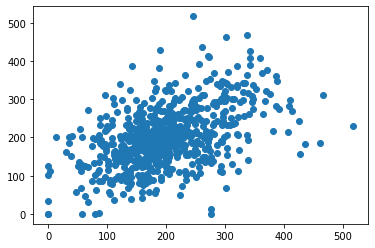

In [23]:
plt.scatter(df_agg['energy'].shift(-1), df_agg['energy'])

,energy,energy_prev_1,energy_prev_2,energy_prev_3,energy_prev_4,energy_prev_5,energy_prev_6
6,339.39,192.39,295.22,110.14,182.25,192.29,218.31
7,286.65,339.39,192.39,295.22,110.14,182.25,192.29
8,188.30,286.65,339.39,192.39,295.22,110.14,182.25
9,198.49,188.30,286.65,339.39,192.39,295.22,110.14
10,272.43,198.49,188.30,286.65,339.39,192.39,295.22
11,66.90,272.43,198.49,188.30,286.65,339.39,192.39
12,301.33,66.90,272.43,198.49,188.30,286.65,339.39
13,293.82,301.33,66.90,272.43,198.49,188.30,286.65
14,247.13,293.82,301.33,66.90,272.43,198.49,188.30
15,250.54,247.13,293.82,301.33,66.90,272.43,198.49


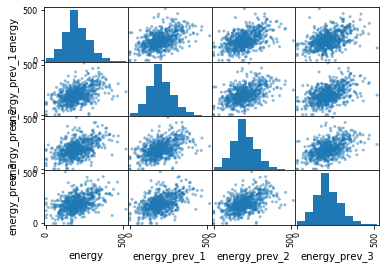

In [24]:
from pandas.plotting import scatter_matrix
df_temp = pd.DataFrame()
df_temp['energy'] = df_agg['energy']
for x in range(1, 7):
    df_temp[f'energy_prev_{x}'] = df_temp['energy'].shift(x)
scatter_matrix(df_temp[['energy', 'energy_prev_1', 'energy_prev_2', 'energy_prev_3']])
df_temp.dropna().head(10)

In [25]:
df_agg = preproc_df.groupby(['name', 'date']).agg('sum').reset_index()
df_agg['day_of_week'] = pd.to_datetime(df_agg['date']).dt.day_name()
df_agg['month'] = pd.to_datetime(df_agg['date']).dt.month_name()

for col in ['day_of_week', 'month']:
    df_agg[col] = df_agg[col].astype('category')
    
df_agg = df_agg.join(pd.get_dummies(df_agg.select_dtypes('category')))
df_agg = df_agg.drop(df_agg.select_dtypes('category'), axis=1)

# df_agg.columns = df_agg.columns.to_flat_index()
# df_agg.columns

# for x in range(1, 7):
#     df_agg[f'energy_prev_{x}'] = df_agg['energy'].shift(x)
# df_agg = df_agg.dropna()
# df_agg.head()

stations = [g for _, g in df_agg.groupby('name')]

def offset_col_x_days(df, col, days):
    for x in range(1, days):
        df[f'{col}_prev_{7+x}'] = df[col].shift(7+x)
    df = df.dropna().reset_index(drop=True)
    return df

for i in range(len(stations)):
    for col in ['energy', 'on_peak', 'mid_day', 'off_peak', 'error_rounding', 'error_calculation', 'session_type_DEVICE', 'session_type_MOBILE', 'session_type_WEB',
       'port_type_CHADEMO', 'port_type_DCCOMBOTYP1', 'payment_mode_CREDITCARD',
       'payment_mode_RFID']:
        stations[i] = offset_col_x_days(stations[i], col, 7)
stations[0]

,name,date,energy,on_peak,mid_day,off_peak,correct_amount,error_rounding,error_calculation,session_type_DEVICE,...,payment_mode_CREDITCARD_prev_10,payment_mode_CREDITCARD_prev_11,payment_mode_CREDITCARD_prev_12,payment_mode_CREDITCARD_prev_13,payment_mode_RFID_prev_8,payment_mode_RFID_prev_9,payment_mode_RFID_prev_10,payment_mode_RFID_prev_11,payment_mode_RFID_prev_12,payment_mode_RFID_prev_13
0,A,2019-02-17,229.85,8.0,8.0,4.0,119.41,0.0,2.0,4,...,10.0,9.0,9.0,4.0,4.0,4.0,7.0,3.0,2.0,0.0
1,A,2019-02-18,189.50,3.0,13.0,3.0,97.87,0.0,2.0,6,...,6.0,10.0,9.0,9.0,11.0,4.0,4.0,7.0,3.0,2.0
2,A,2019-02-19,193.40,3.0,7.0,5.0,100.36,0.0,3.0,4,...,11.0,6.0,10.0,9.0,7.0,11.0,4.0,4.0,7.0,3.0
3,A,2019-02-20,189.90,4.0,13.0,2.0,97.95,0.0,1.0,11,...,3.0,11.0,6.0,10.0,7.0,7.0,11.0,4.0,4.0,7.0
4,A,2019-02-21,252.41,3.0,5.0,2.0,131.23,0.0,1.0,4,...,6.0,3.0,11.0,6.0,7.0,7.0,7.0,11.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,A,2019-08-27,313.51,9.0,9.0,5.0,166.45,0.0,5.0,11,...,17.0,12.0,10.0,19.0,13.0,14.0,9.0,6.0,12.0,9.0
190,A,2019-08-28,377.26,5.0,11.0,9.0,199.33,0.0,4.0,8,...,11.0,17.0,12.0,10.0,11.0,13.0,14.0,9.0,6.0,12.0
191,A,2019-08-29,372.45,5.0,14.0,5.0,194.84,0.0,2.0,15,...,9.0,11.0,17.0,12.0,9.0,11.0,13.0,14.0,9.0,6.0
192,A,2019-08-30,305.04,4.0,9.0,8.0,157.58,0.0,3.0,7,...,11.0,9.0,11.0,17.0,4.0,9.0,11.0,13.0,14.0,9.0


In [26]:
stations[1]['date'][0]

datetime.date(2019, 3, 4)

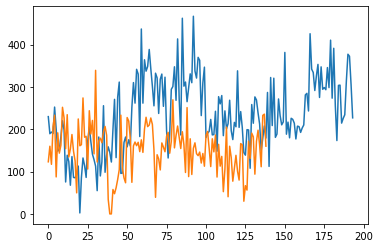

In [27]:
plt.plot(stations[0]['energy'])
plt.plot(stations[1]['energy'])

In [28]:
stations[1]

,name,date,energy,on_peak,mid_day,off_peak,correct_amount,error_rounding,error_calculation,session_type_DEVICE,...,payment_mode_CREDITCARD_prev_10,payment_mode_CREDITCARD_prev_11,payment_mode_CREDITCARD_prev_12,payment_mode_CREDITCARD_prev_13,payment_mode_RFID_prev_8,payment_mode_RFID_prev_9,payment_mode_RFID_prev_10,payment_mode_RFID_prev_11,payment_mode_RFID_prev_12,payment_mode_RFID_prev_13
0,B,2019-03-04,123.13,3.0,1.0,4.0,66.44,0.0,2.0,3,...,10.0,7.0,8.0,7.0,2.0,5.0,9.0,4.0,2.0,7.0
1,B,2019-03-05,159.90,3.0,7.0,3.0,82.34,0.0,0.0,7,...,8.0,10.0,7.0,8.0,9.0,2.0,5.0,9.0,4.0,2.0
2,B,2019-03-06,117.19,3.0,6.0,2.0,61.58,0.0,0.0,6,...,6.0,8.0,10.0,7.0,7.0,9.0,2.0,5.0,9.0,4.0
3,B,2019-03-07,206.21,10.0,5.0,1.0,110.20,0.0,0.0,6,...,6.0,6.0,8.0,10.0,8.0,7.0,9.0,2.0,5.0,9.0
4,B,2019-03-08,233.24,5.0,10.0,8.0,120.97,0.0,0.0,13,...,13.0,6.0,6.0,8.0,1.0,8.0,7.0,9.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,B,2019-08-27,163.22,3.0,6.0,1.0,83.27,0.0,0.0,2,...,35.0,24.0,22.0,10.0,0.0,7.0,10.0,11.0,13.0,18.0
135,B,2019-08-28,111.51,1.0,6.0,2.0,56.78,0.0,0.0,4,...,4.0,35.0,24.0,22.0,7.0,0.0,7.0,10.0,11.0,13.0
136,B,2019-08-29,232.71,5.0,10.0,3.0,120.85,0.0,4.0,9,...,4.0,4.0,35.0,24.0,7.0,7.0,0.0,7.0,10.0,11.0
137,B,2019-08-30,235.69,5.0,5.0,1.0,126.67,0.0,1.0,7,...,5.0,4.0,4.0,35.0,3.0,7.0,7.0,0.0,7.0,10.0


In [29]:
stations[0]

,name,date,energy,on_peak,mid_day,off_peak,correct_amount,error_rounding,error_calculation,session_type_DEVICE,...,payment_mode_CREDITCARD_prev_10,payment_mode_CREDITCARD_prev_11,payment_mode_CREDITCARD_prev_12,payment_mode_CREDITCARD_prev_13,payment_mode_RFID_prev_8,payment_mode_RFID_prev_9,payment_mode_RFID_prev_10,payment_mode_RFID_prev_11,payment_mode_RFID_prev_12,payment_mode_RFID_prev_13
0,A,2019-02-17,229.85,8.0,8.0,4.0,119.41,0.0,2.0,4,...,10.0,9.0,9.0,4.0,4.0,4.0,7.0,3.0,2.0,0.0
1,A,2019-02-18,189.50,3.0,13.0,3.0,97.87,0.0,2.0,6,...,6.0,10.0,9.0,9.0,11.0,4.0,4.0,7.0,3.0,2.0
2,A,2019-02-19,193.40,3.0,7.0,5.0,100.36,0.0,3.0,4,...,11.0,6.0,10.0,9.0,7.0,11.0,4.0,4.0,7.0,3.0
3,A,2019-02-20,189.90,4.0,13.0,2.0,97.95,0.0,1.0,11,...,3.0,11.0,6.0,10.0,7.0,7.0,11.0,4.0,4.0,7.0
4,A,2019-02-21,252.41,3.0,5.0,2.0,131.23,0.0,1.0,4,...,6.0,3.0,11.0,6.0,7.0,7.0,7.0,11.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,A,2019-08-27,313.51,9.0,9.0,5.0,166.45,0.0,5.0,11,...,17.0,12.0,10.0,19.0,13.0,14.0,9.0,6.0,12.0,9.0
190,A,2019-08-28,377.26,5.0,11.0,9.0,199.33,0.0,4.0,8,...,11.0,17.0,12.0,10.0,11.0,13.0,14.0,9.0,6.0,12.0
191,A,2019-08-29,372.45,5.0,14.0,5.0,194.84,0.0,2.0,15,...,9.0,11.0,17.0,12.0,9.0,11.0,13.0,14.0,9.0,6.0
192,A,2019-08-30,305.04,4.0,9.0,8.0,157.58,0.0,3.0,7,...,11.0,9.0,11.0,17.0,4.0,9.0,11.0,13.0,14.0,9.0


In [30]:
X = stations[0]
y = X[['energy', 'error_rounding', 'error_calculation']]
train_test_split = int(len(X) * 0.8)
date_train, date_test = X[:train_test_split]['date'], X[train_test_split:]['date']
X = X.drop(['name', 'date', 'correct_amount', 'correct_duration', 'energy', 'on_peak', 'mid_day', 'off_peak', 'error_rounding', 'error_calculation', 'session_type_DEVICE', 'session_type_MOBILE', 'session_type_WEB',
       'port_type_CHADEMO', 'port_type_DCCOMBOTYP1', 'payment_mode_CREDITCARD',
       'payment_mode_RFID'], axis=1)

X_train, X_test = X[:train_test_split], X[train_test_split:]
y_train, y_test = y[:train_test_split], y[train_test_split:]


In [31]:
X_train.head()

,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_April,month_August,month_December,...,payment_mode_CREDITCARD_prev_10,payment_mode_CREDITCARD_prev_11,payment_mode_CREDITCARD_prev_12,payment_mode_CREDITCARD_prev_13,payment_mode_RFID_prev_8,payment_mode_RFID_prev_9,payment_mode_RFID_prev_10,payment_mode_RFID_prev_11,payment_mode_RFID_prev_12,payment_mode_RFID_prev_13
0,0,0,0,1,0,0,0,0,0,0,...,10.0,9.0,9.0,4.0,4.0,4.0,7.0,3.0,2.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,6.0,10.0,9.0,9.0,11.0,4.0,4.0,7.0,3.0,2.0
2,0,0,0,0,0,1,0,0,0,0,...,11.0,6.0,10.0,9.0,7.0,11.0,4.0,4.0,7.0,3.0
3,0,0,0,0,0,0,1,0,0,0,...,3.0,11.0,6.0,10.0,7.0,7.0,11.0,4.0,4.0,7.0
4,0,0,0,0,1,0,0,0,0,0,...,6.0,3.0,11.0,6.0,7.0,7.0,7.0,11.0,4.0,4.0


In [32]:
X_train.columns

Index(['day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'energy_prev_8', 'energy_prev_9',
       'energy_prev_10', 'energy_prev_11', 'energy_prev_12', 'energy_prev_13',
       'on_peak_prev_8', 'on_peak_prev_9', 'on_peak_prev_10',
       'on_peak_prev_11', 'on_peak_prev_12', 'on_peak_prev_13',
       'mid_day_prev_8', 'mid_day_prev_9', 'mid_day_prev_10',
       'mid_day_prev_11', 'mid_day_prev_12', 'mid_day_prev_13',
       'off_peak_prev_8', 'off_peak_prev_9', 'off_peak_prev_10',
       'off_peak_prev_11', 'off_peak_prev_12', 'off_peak_prev_13',
       'error_rounding_prev_8', 'error_rounding_prev_9',
       'error_rounding_prev_10', 'error_rounding

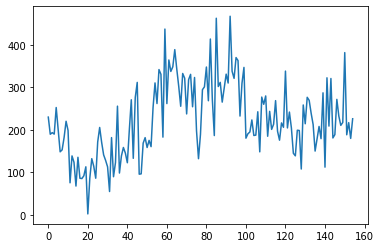

In [44]:
plt.plot(y_train['energy'])

d:\users\seany\projects\garys-best\venv\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-2.130676508500225

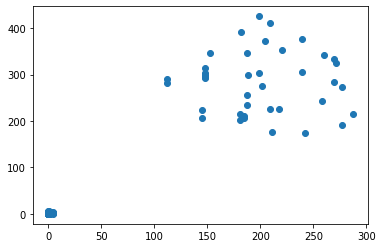

In [34]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
plt.scatter(y_pred, y_test)
score

d:\users\seany\projects\garys-best\venv\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-1.0558619678895804

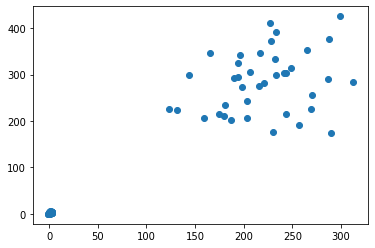

In [35]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
plt.scatter(y_pred, y_test)
score

In [36]:
# from sklearn.utils import check_arrays
def mape(y_true, y_pred): 
#     y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape(y_test, y_pred)

energy               27.793156
error_rounding             inf
error_calculation          inf
dtype: float64

In [37]:
sorted(y_pred - y_test)

['energy', 'error_calculation', 'error_rounding']

In [38]:
y_test

,energy,error_rounding,error_calculation
155,223.40,0.0,4.0
156,214.35,0.0,0.0
157,177.06,0.0,3.0
158,207.36,0.0,1.0
159,206.21,0.0,3.0
160,192.57,0.0,2.0
161,202.96,0.0,3.0
162,210.16,0.0,5.0
163,281.21,0.0,6.0
164,284.86,0.0,4.0


In [39]:
predictions = [[] for j in range(len(y_pred[0]))]
for i in range(len(y_pred)):
    for j in range(len(y_pred[i])):
        predictions[j].append(y_pred[i][j])

In [40]:
for i in range(len(predictions[1])):
    predictions[1][i] = 0 if predictions[1][i] < 0 else predictions[1][i] 
for i in range(len(predictions[2])):
    predictions[2][i] = 0 if predictions[2][i] < 0 else predictions[2][i]
predictions[0] = np.round(predictions[0], 2)
predictions[1] = np.round(predictions[1])
predictions[2] = np.round(predictions[2])

In [41]:
predictions[0]

array([131.61, 174.94, 229.79, 159.33, 202.93, 257.2 , 186.64, 179.37,
       221.36, 311.93, 202.88, 298.45, 196.4 , 232.25, 286.95, 194.32,
       264.92, 216.22, 217.16, 194.16, 144.03, 189.9 , 165.3 , 233.21,
       226.64, 198.23, 233.05, 270.63, 289.56, 243.18, 241.43, 243.13,
       269.05, 180.95, 248.98, 288.1 , 228.15, 206.92, 123.  ])

In [42]:
y_test['energy']

155    223.40
156    214.35
157    177.06
158    207.36
159    206.21
160    192.57
161    202.96
162    210.16
163    281.21
164    284.86
165    243.19
166    425.72
167    342.12
168    334.15
169    291.56
170    325.92
171    353.27
172    275.11
173    347.42
174    294.49
175    298.56
176    293.43
177    345.74
178    298.40
179    410.51
180    273.44
181    391.31
182    255.94
183    173.32
184    303.64
185    304.24
186    214.53
187    225.70
188    234.21
189    313.51
190    377.26
191    372.45
192    305.04
193    226.99
Name: energy, dtype: float64

In [5]:
from fbprophet import Prophet

m = Prophet()
m.fit(df)

ModuleNotFoundError: No module named 'fbprophet'

In [43]:
df_test = pd.DataFrame({'date': date_test, 'energy': predictions[0], 'error_rounding': predictions[1], 'error_calculation': predictions[2]})
df_test.to_csv('test_run.csv',index=False)